In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
df = pd.read_pickle('../TP3/data/simulation_runs_ys.pkl')
df, df.shape

(        white_y  run           t  ball_count  kinetic_energy
 0          47.0    0    0.000000        16.0    3.300000e+06
 1          47.0    0    0.586253        16.0    3.300000e+06
 2          47.0    0    0.586414        16.0    3.300000e+06
 3          47.0    0    0.586549        16.0    3.300000e+06
 4          47.0    0    0.586866        16.0    3.300000e+06
 ...         ...  ...         ...         ...             ...
 211615     56.0  999  324.347977         2.0    1.497796e+03
 211616     56.0  999  348.441597         2.0    1.497796e+03
 211617     56.0  999  359.999291         2.0    1.497796e+03
 211618     56.0  999  360.820086         1.0    7.125836e+02
 211619     56.0  999  389.377474         0.0    0.000000e+00
 
 [2317744 rows x 5 columns],
 (2317744, 5))

In [3]:
df['duration'] = -df.groupby(['white_y', 'run'])['t'].diff(-1)
# df.to_csv('output.csv', index=False)
df

,white_y,run,t,ball_count,kinetic_energy,duration
0,47.0,0,0.000000,16.0,3.300000e+06,0.586253
1,47.0,0,0.586253,16.0,3.300000e+06,0.000162
2,47.0,0,0.586414,16.0,3.300000e+06,0.000135
3,47.0,0,0.586549,16.0,3.300000e+06,0.000317
4,47.0,0,0.586866,16.0,3.300000e+06,0.000233
...,...,...,...,...,...,...
211615,56.0,999,324.347977,2.0,1.497796e+03,24.093620
211616,56.0,999,348.441597,2.0,1.497796e+03,11.557694
211617,56.0,999,359.999291,2.0,1.497796e+03,0.820795
211618,56.0,999,360.820086,1.0,7.125836e+02,28.557388


# Ejercicio 1.1

In [4]:
# Primero filtro con los valores de white_y dentro del rango
white_y_values = set(range(47, 57))
filtered_df = df[df['white_y'].isin(white_y_values)]

df['white_y'].unique(), filtered_df['white_y'].unique()

(array([47., 48., 49., 50., 51., 52., 53., 54., 55., 56.]),
 array([47., 48., 49., 50., 51., 52., 53., 54., 55., 56.]))

In [5]:
# Obtener el numero de bins para el histograma por Regla de Sturges
n_bins_sturges = int(np.ceil(np.log2(len(filtered_df['duration']) + 1))) 
n_bins_sturges

22

Mean time between events: 295.650003718063 std: 5465.9319762432715
Mean frequency of events: 1213.8673733640996 std: 130265.87745736602


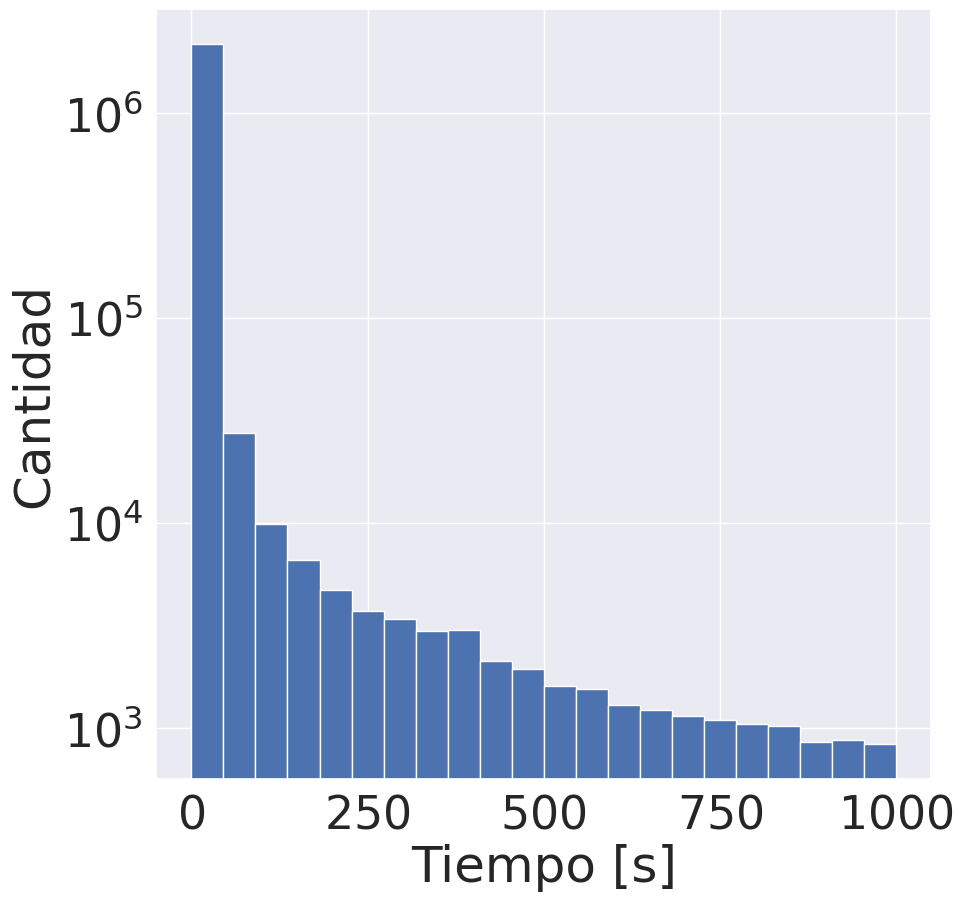

In [16]:
# Distribucion de tiempo entre eventos
ax = filtered_df['duration'].hist(bins=n_bins_sturges, range=[0, 1000])
sns.set(font_scale=3)
ax.ticklabel_format(style='sci', useMathText=True)
ax.set_yscale('log')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Tiempo [s]')
# Tiempo medio entre eventos
print(f"Mean time between events: {filtered_df['duration'].mean()} std: {filtered_df['duration'].std()}")
# Frecuencia media entre eventos
print(f"Mean frequency of events: {(1/filtered_df['duration']).mean()} std: {(1/filtered_df['duration']).std()}")

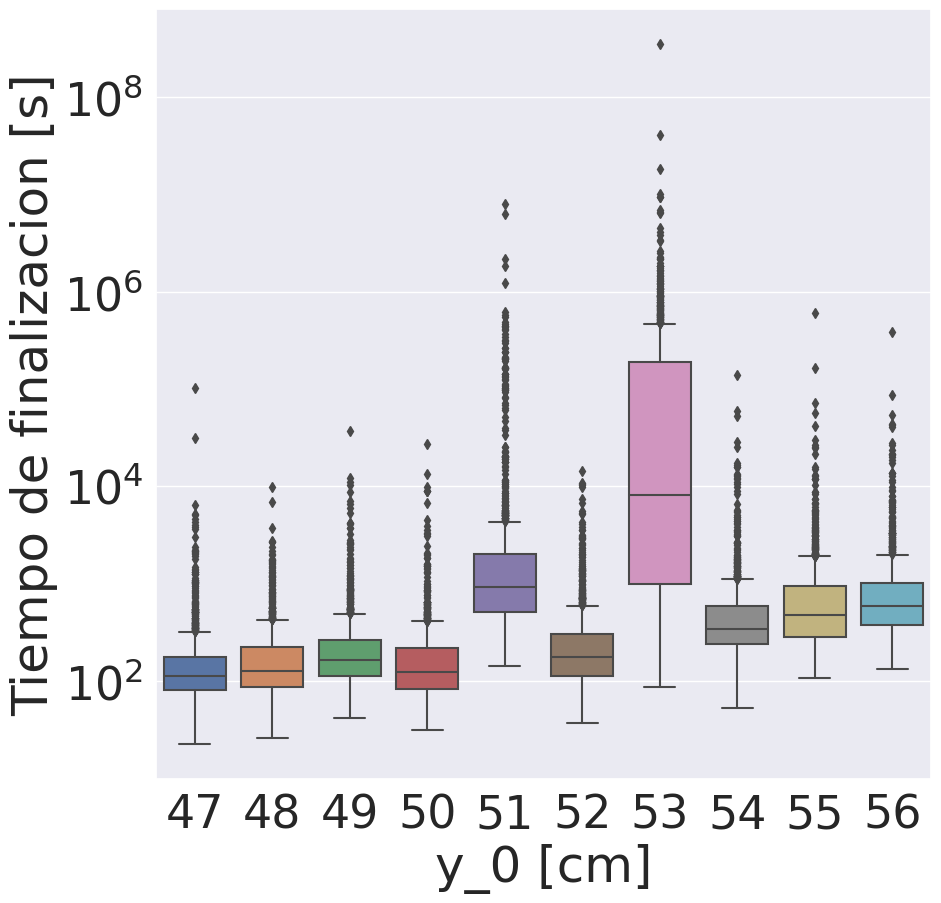

In [31]:
# Agarro los finales de las simulaciones
total = filtered_df[filtered_df['ball_count'] == 0].drop(columns=['ball_count', 'kinetic_energy', 'duration'])

#Distribucion de duracion total agrupados por la posicion de la blanca
sns.set(font_scale=3)
ax = sns.boxplot(data=total, x=total['white_y'].astype(int), y='t')
plt.yscale('log')

ax.set_ylabel('Tiempo de finalizacion [s]')
ax.set_xlabel('y_0 [cm]')
plt.show()

In [8]:
df_speeds = pd.read_pickle('../TP3/data/simulation_runs_speeds.pkl')
df_speeds, df_speeds.shape

(        initial_speed  run          t  ball_count  kinetic_energy
 0               200.0    0   0.000000        16.0    3.300000e+06
 1               200.0    0   0.531500        16.0    3.300000e+06
 2               200.0    0   0.531642        16.0    3.300000e+06
 3               200.0    0   0.531678        16.0    3.300000e+06
 4               200.0    0   0.531780        16.0    3.300000e+06
 ...               ...  ...        ...         ...             ...
 224731         3200.0  999  84.610287         1.0    4.280615e+05
 224732         3200.0  999  84.849774         1.0    4.280615e+05
 224733         3200.0  999  87.831563         1.0    4.280615e+05
 224734         3200.0  999  89.203630         1.0    4.280615e+05
 224735         3200.0  999  89.365997         0.0    0.000000e+00
 
 [1182080 rows x 5 columns],
 (1182080, 5))

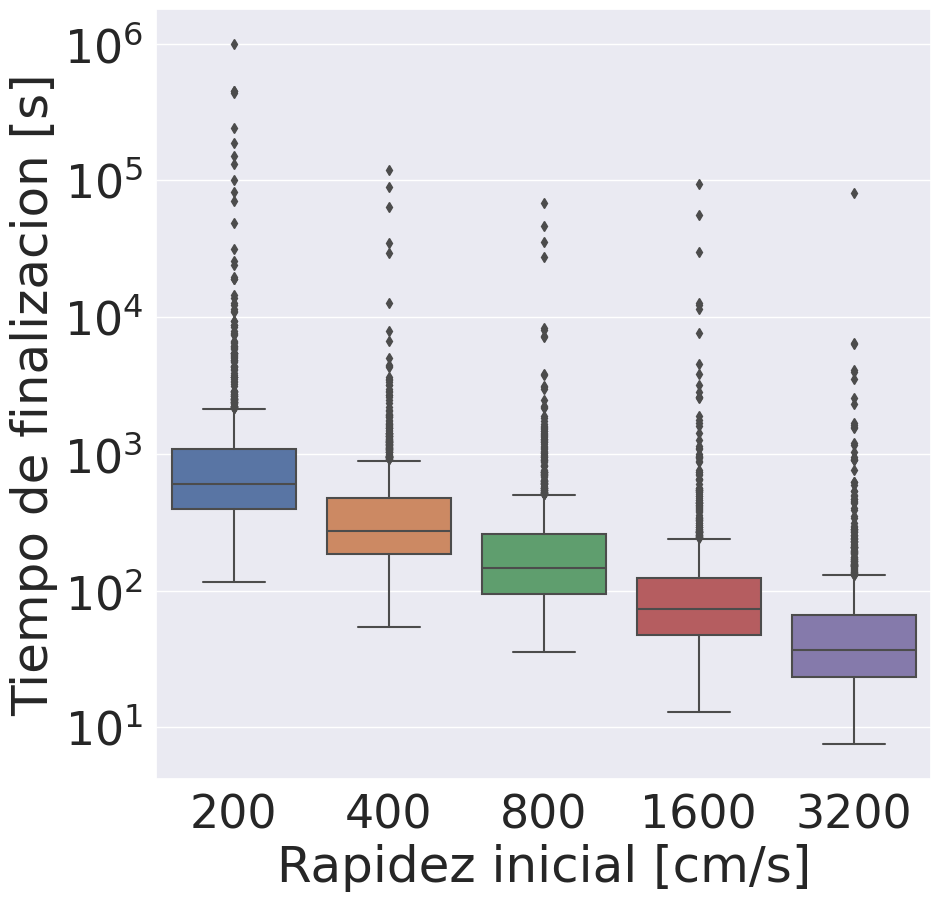

In [29]:
# Agarro los finales de las simulaciones
total = df_speeds[df_speeds['ball_count'] == 0].drop(columns=['ball_count', 'kinetic_energy'])

#Distribucion de duracion total agrupados por la posicion de la blanca
sns.set(font_scale=3)
ax = sns.boxplot(data=total, x =total['initial_speed'].astype(int), y='t')
plt.yscale('log')
ax.set_ylabel('Tiempo de finalizacion [s]')
ax.set_xlabel('Rapidez inicial [cm/s]')



plt.show()

,white_y,run,t,ball_count,kinetic_energy,duration
0,53.0,0,0.000000,16.0,3.300000e+06,0.535755
1,53.0,0,0.535755,16.0,3.300000e+06,0.000152
2,53.0,0,0.535907,16.0,3.300000e+06,0.000158
3,53.0,0,0.536065,16.0,3.300000e+06,0.000141
4,53.0,0,0.536205,16.0,3.300000e+06,0.000142
5,53.0,0,0.536347,16.0,3.300000e+06,0.136253
6,53.0,0,0.672600,16.0,3.300000e+06,0.090038
7,53.0,0,0.762638,16.0,3.300000e+06,0.264101
8,53.0,0,1.026739,16.0,3.300000e+06,0.069583
9,53.0,0,1.096323,16.0,3.300000e+06,0.299383


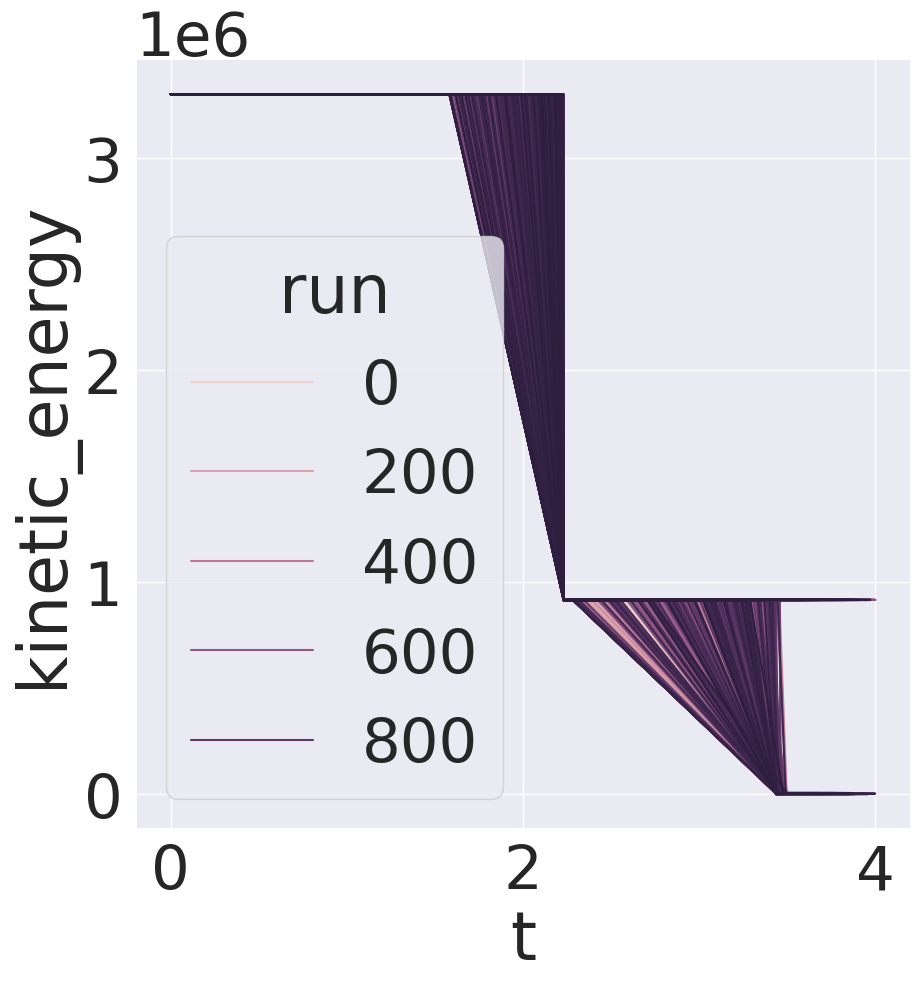

In [10]:
y53 = df[(df['white_y'] == 53) & (df['t'] < 4)]
sns.lineplot(data=y53, x='t', y='kinetic_energy', hue='run')
y53[y53['run'] == 0]